In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import timeit
import numpy as np

In [25]:
def depthsearch(tree, entry):
    flag = False
    if entry == tree["node"]:
        flag = True
    if entry < tree["node"]:
        if "left" in tree:
            flag = depthsearch(tree["left"], entry)
    if entry > tree["node"]:
        if "right" in tree:
            flag = depthsearch(tree["right"], entry)
    return(flag)

In [26]:
#this tree build does not work as expected
def build_tree(number_list):
    
    # Sort the list
    sorted_list = np.sort(number_list)
    
    # Find the median's value and index
    median_value_index = int(len(sorted_list) / 2)
    median = sorted_list[median_value_index]
    
    # Initialize the dictionaries
    dictionary = {}
    left_dictionary = {'node': sorted_list[0]}
    right_dictionary = {'node': sorted_list[len(sorted_list) - 1]}
    
    # Build the left and right sides
    for index in range(1, median_value_index):
        left_dictionary = {'node': sorted_list[index], 'left': left_dictionary}
        right_dictionary = {'node': sorted_list[len(sorted_list) - index - 1], 'right': right_dictionary}
    
    # Combine the dictionaries
    dictionary = {'left': left_dictionary, 
                  'node': right_dictionary['node'], 
                  'right': right_dictionary['right']}
    
    # DEBUGGING
    #print(sorted_list)
    #print("node: ", dictionary['node'])
    #print("left: ", dictionary['left'])
    #print("right: ", dictionary['right'])
    
    return dictionary

test_list = list(range(100))
build_tree(test_list)

{'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'left': {'node': 0},
                                                  'node': 1},
                                                 'node': 2},
                                                'node': 3},
                                               'node': 4},
                                              'node': 5},
                                             'node': 6},
                                            'node': 7},
                                           'node': 8},
                                          'node': 9},
               

In [27]:
#function appends to a list for plotting, appends the length of time a search takes for the first N values of a list:
def get_speeds(input_vector, N):
    
    #builds a tree based on the first N values of the input vector
    tree = build_tree(input_vector[0:N]) # build the tree
    
    #create a random integer to search for within the tree
    ri = input_vector[0]
    
    time = 0
    #start timer
    start = timeit.default_timer()
    
    #run search 100 times:
    for j in range(100):
        depthsearch(tree, ri)
    #stop timer:
    stop = timeit.default_timer()
    
    #get total time for 100 searches through the first N values in the input vector:
    time = (stop - start)
    
    #append total time to the timer list
    timer.append(time)
  

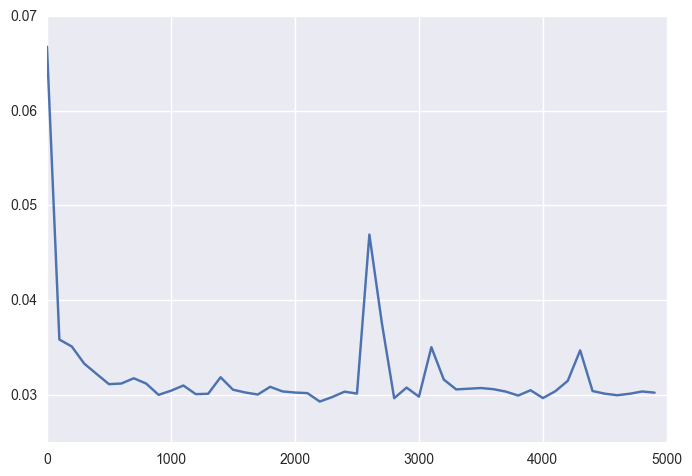

In [28]:
#initiate a test list and timer list
test_list = list(range(1000))
timer = []

#plots the speed of a tree search for the first N values within a list
def plot_speeds(input_vector,N,steps):
    #creates list of how many items to serach through
    list_of_N = np.arange(1,N,steps)

    
#loop plots the time it takes to run a search each number of items it searches through
    for i in list_of_N:
        get_speeds(input_vector,N)
    plt.plot(list_of_N,timer)
    plt.show()
    
plot_speeds(test_list,5000,100)